In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import powerlaw

In [112]:
paper_df = pd.read_csv("../data/processed/openalex_paper_df.csv")
paper_df

,Year,DOI,Title,OpenAlex Year,OpenAlex Publication Date,OpenAlex ID,OpenAlex Title,OpenAlex DOI,OpenAlex URL,OpenAlex Venue ID,OpenAlex Venue Name,OpenAlex Publisher,Publication Type,OpenAlex First Page,OpenAlex Last Page,Number of Pages,Number of References,Number of Citations,Citation API URL,Number of Citation API URLs
0,2011,10.1109/TVCG.2011.185,D³ Data-Driven Documents,2011,2011-12-01,W2135415614,D³ Data-Driven Documents,https://doi.org/10.1109/tvcg.2011.185,https://doi.org/10.1109/tvcg.2011.185,https://openalex.org/V84775595,IEEE Transactions on Visualization and Compute...,Institute of Electrical and Electronics Engineers,journal-article,2301.0,2309.0,9.0,27,2182.0,https://api.openalex.org/works?filter=cites:W2...,1
1,1991,10.1109/VISUAL.1991.175815,Tree-maps: a space-filling approach to the vis...,1991,1991-10-22,W2146872957,Tree-maps: a space-filling approach to the vis...,https://doi.org/10.5555/949607.949654,https://dx.doi.org/10.1109/VISUAL.1991.175815,NaN,ieee visualization,IEEE Computer Society Press,proceedings-article,284.0,291.0,8.0,21,1118.0,https://api.openalex.org/works?filter=cites:W2...,1
2,1990,10.1109/VISUAL.1990.146402,Parallel coordinates: a tool for visualizing m...,1990,1990-10-23,W2034694694,Parallel coordinates: a tool for visualizing m...,https://doi.org/10.5555/949531.949588,https://dx.doi.org/10.1109/VISUAL.1990.146402,NaN,ieee visualization,IEEE Computer Society Press,proceedings-article,361.0,378.0,18.0,20,993.0,https://api.openalex.org/works?filter=cites:W2...,1
3,2006,10.1109/TVCG.2006.147,Hierarchical Edge Bundles: Visualization of Ad...,2006,2006-09-01,W2145640629,Hierarchical Edge Bundles: Visualization of Ad...,https://doi.org/10.1109/tvcg.2006.147,https://doi.org/10.1109/tvcg.2006.147,https://openalex.org/V84775595,IEEE Transactions on Visualization and Compute...,Institute of Electrical and Electronics Engineers,journal-article,741.0,748.0,8.0,32,791.0,https://api.openalex.org/works?filter=cites:W2...,1
4,1997,10.1109/VISUAL.1997.663860,ROAMing terrain: Real-time Optimally Adapting ...,1997,1997-10-01,W2532506824,ROAMing terrain: real-time optimally adapting ...,https://doi.org/10.5555/266989.267028,https://digital.library.unt.edu/ark:/67531/met...,NaN,ieee visualization,IEEE Computer Society Press,proceedings-article,81.0,88.0,8.0,20,586.0,https://api.openalex.org/works?filter=cites:W2...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3269,2021,10.1109/TVCG.2021.3084694,Interactive Graph Construction for Graph-Based...,2021,2021-09-01,W3164124914,Interactive Graph Construction for Graph-Based...,https://doi.org/10.1109/tvcg.2021.3084694,https://doi.org/10.1109/tvcg.2021.3084694,https://openalex.org/V84775595,IEEE Transactions on Visualization and Compute...,Institute of Electrical and Electronics Engineers,journal-article,3701.0,3716.0,16.0,64,0.0,https://api.openalex.org/works?filter=cites:W3...,1
3270,2021,10.1109/TVCG.2021.3114777,Visual Evaluation for Autonomous Driving,2022,2022-01-01,W4206138314,Visual Evaluation for Autonomous Driving.,https://doi.org/10.1109/tvcg.2021.3114777,https://pubmed.ncbi.nlm.nih.gov/34723804/,https://openalex.org/V84775595,IEEE Transactions on Visualization and Compute...,Institute of Electrical and Electronics Engineers,journal-article,1030.0,1039.0,10.0,0,NaN,https://api.openalex.org/works?filter=cites:W4...,1
3271,2021,10.1109/TVCG.2021.3071387,Visual Cascade Analytics of Large-scale Spatio...,2021,2021-04-06,W3152147466,Visual Cascade Analytics of Large-scale Spatio...,https://doi.org/10.1109/tvcg.2021.3071387,https://doi.org/10.1109/tvcg.2021.3071387,https://openalex.org/V84775595,IEEE Transactions on Visualization and Compute...,Institute of Electrical and Electronics Engineers,journal-article,1.0,1.0,1.0,55,4.0,https://api.openalex.org/works?filter=cites:W3...,1
3272,2021,10.1109/TVCG.2020.3032984,Understanding Missing Links in Bipartite Netwo...,2020,2020-10-22,W3094173950,Understanding Missing Links in 

In [113]:
vis_paper_openalex_ids = paper_df['OpenAlex ID'].tolist()

## Number of References

In [114]:
np.nansum(paper_df['Number of References'].tolist())

94783

In [106]:
# Each paepr has a number of references
paper_df[paper_df['Number of References'].isnull()]

,Year,DOI,Title,OpenAlex Year,OpenAlex Publication Date,OpenAlex ID,OpenAlex Title,OpenAlex DOI,OpenAlex URL,OpenAlex Venue ID,OpenAlex Venue Name,OpenAlex Publisher,Publication Type,OpenAlex First Page,OpenAlex Last Page,Number of Pages,Number of References,Number of Citations,Citation API URL,Number of Citation API URLs


In [107]:
min(paper_df['Number of References'].tolist())

0

In [109]:
paper_df[paper_df['Number of References']==0]

,Year,DOI,Title,OpenAlex Year,OpenAlex Publication Date,OpenAlex ID,OpenAlex Title,OpenAlex DOI,OpenAlex URL,OpenAlex Venue ID,OpenAlex Venue Name,OpenAlex Publisher,Publication Type,OpenAlex First Page,OpenAlex Last Page,Number of Pages,Number of References,Number of Citations,Citation API URL,Number of Citation API URLs
82,1999,10.1109/VISUAL.1999.809908,Multiresolution Techniques for Interactive Tex...,1999,1999-01-01,W3147279153,Multiresolution techniques for interactive tex...,https://doi.org/10.1109/visual.1999.809908,https://doi.org/10.1109/visual.1999.809908,NaN,ieee visualization,NaN,proceedings-article,355.0,543.0,189.0,0,238.0,https://api.openalex.org/works?filter=cites:W3...,1
206,2005,10.1109/INFVIS.2005.1532128,Voronoi treemaps,2005,2005-10-23,W2296269484,Voronoi treemaps,https://doi.org/10.1109/infovis.2005.40,https://doi.org/10.1109/infovis.2005.40,NaN,ieee symposium on information visualization,NaN,proceedings-article,7.0,NaN,NaN,0,127.0,https://api.openalex.org/works?filter=cites:W2...,1
565,2000,10.1109/VISUAL.2000.885692,Visual cues for imminent object contact in rea...,2000,2000-01-01,W3145343953,Visual cues for imminent object contact in rea...,https://doi.org/10.1109/visual.2000.885692,https://doi.org/10.1109/visual.2000.885692,NaN,ieee visualization,NaN,proceedings-article,179.0,185.0,7.0,0,18.0,https://api.openalex.org/works?filter=cites:W3...,1
1202,1990,10.1109/VISUAL.1990.146389,Visualizing a scalar field on an N-dimensional...,1990,1990-10-23,W2083909211,Visualizing a scalar field on an N-dimensional...,https://doi.org/10.5555/949531.949571,https://dblp.uni-trier.de/db/conf/visualizatio...,NaN,ieee visualization,IEEE Computer Society Press,proceedings-article,255.0,262.0,8.0,0,32.0,https://api.openalex.org/works?filter=cites:W2...,1
1731,1996,10.1109/VISUAL.1996.568115,FEL: The Field Encapsulation Library,1992,1992-01-01,W3140413643,FEL: the Field Encapsulation Library,https://doi.org/10.1109/visual.1996.568115,https://doi.org/10.1109/visual.1996.568115,NaN,ieee visualization,NaN,proceedings-article,241.0,247.0,7.0,0,18.0,https://api.openalex.org/works?filter=cites:W3...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2021,10.1109/TVCG.2021.3114851,COVID-view: Diagnosis of COVID-19 using Chest CT,2022,2022-01-01,W4205557286,COVID-view: Diagnosis of COVID-19 using Chest CT.,https://doi.org/10.1109/tvcg.2021.3114851,https://pubmed.ncbi.nlm.nih.gov/34587075/,https://openalex.org/V84775595,IEEE Transactions on Visualization and Compute...,Institute of Electrical and Electronics Engineers,journal-article,227.0,237.0,11.0,0,NaN,https://api.openalex.org/works?filter=cites:W4...,1
3266,2021,10.1109/TVCG.2021.3114840,ThreadStates: State-based Visual Analysis of D...,2021,2021-09-29,W3202949724,ThreadStates: State-based Visual Analysis of D...,https://doi.org/10.1109/tvcg.2021.3114840,https://doi.org/10.1109/tvcg.2021.3114840,https://openalex.org/V84775595,IEEE Transactions on Visualization and Compute...,Institute of Electrical and Electronics Engineers,journal-article,1.0,1.0,1.0,0,0.0,https://api.openalex.org/works?filter=cites:W3...,1
3268,2021,10.1109/TVCG.2021.3059294,Scalable Scalable Vector Graphics: Automatic T...,2021,2021-02-15,W3132948378,Scalable Scalable Vector Graphics: Automatic T...,https://doi.org/10.1109/tvcg.2021.3059294,https://doi.org/10.1109/tvcg.2021.3059294,https://openalex.org/V84775595,IEEE Transactions on Visualization and Compute...,Institute of Electrical and Electronics Engineers,journal-article,1.0,1.0,1.0,0,0.0,https://api.openalex.org/works?filter=cites:W3...,1
3270,2021,10.1109/TVCG.2021.3114777,Visual Evaluation for Autonomous Driving,2022,2022-01-01,W4206138314,Visual Evaluation for Autonomous Driving.,https://doi.org/10.1109/tvcg.2021.3114777,https://pubmed.ncbi.nlm.nih.gov/34723804/,https://openalex.org/V84775595,IEEE Transactions on Visualization and Compute...,Institute of Electrical and Electronics Engineers,journal-article,

<AxesSubplot:xlabel='Number of References', ylabel='Density'>

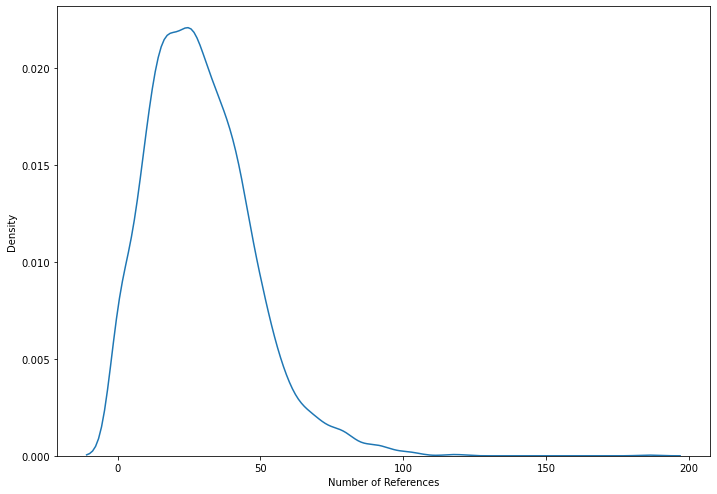

In [92]:
# distribution of number of references
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(paper_df['Number of References'], ax=ax)

In [93]:
ref = pd.read_csv("../data/processed/openalex_reference_df.csv")

In [94]:
ref

,Year,DOI,Title,Number of References,Reference
0,2011,10.1109/TVCG.2011.185,D³ Data-Driven Documents,27,https://openalex.org/W2172175635
1,2011,10.1109/TVCG.2011.185,D³ Data-Driven Documents,27,https://openalex.org/W2118908268
2,2011,10.1109/TVCG.2011.185,D³ Data-Driven Documents,27,https://openalex.org/W2158711339
3,2011,10.1109/TVCG.2011.185,D³ Data-Driven Documents,27,https://openalex.org/W3150686315
4,2011,10.1109/TVCG.2011.185,D³ Data-Driven Documents,27,https://openalex.org/W146699588
...,...,...,...,...,...
94778,2021,10.1109/TVCG.2020.3032984,Understanding Missing Links in Bipartite Netwo...,50,https://openalex.org/W2087194317
94779,2021,10.1109/TVCG.2020.3032984,Understanding Missing Links in Bipartite Netwo...,50,https://openalex.org/W2125748785
94780,2021,10.1109/TVCG.2020.3032984,Understanding Missing Links in Bipartite Netwo...,50,https://openalex.org/W1993436046
94781,2021,10.1109/TVCG.2020.3032984,Understanding Missing Links in Bipartite Netwo...,50,https://openalex.org/W2752242122


In [108]:
ref[ref['Number of References'] == 0]

,Year,DOI,Title,Number of References,Reference


In [110]:
# you can see that ref_df omitted papers whose number of references is zero
len(list(set(ref.DOI.tolist())))

3155

In [95]:
# number of unique reference papers
unique_ref_openalex_url = list(set(ref.Reference.tolist()))
len(unique_ref_openalex_url)

39897

In [96]:
# only 42% of all references are unique
len(unique_ref_openalex_url) / ref.shape[0]

0.42092991359209986

In [97]:
unique_ref_openalex_url[0]

'https://openalex.org/W2128299237'

In [98]:
unique_ref_openalex_id = [re.sub(
    'https://openalex.org/', '', i) for i in unique_ref_openalex_url]

In [99]:
non_vis_ref = [x for x in unique_ref_openalex_id if x not in vis_paper_openalex_ids]

In [102]:
# Among 39897 unique references, 2483 of them are vis papers
len(unique_ref_openalex_url) - len(non_vis_ref)

2483

## Number of Citations

In [32]:
# There are nans in citation_nums; 18 papers don't have citation info
paper_df[paper_df['Number of Citations'].isnull()]

,Year,DOI,Title,OpenAlex Year,OpenAlex Publication Date,OpenAlex ID,OpenAlex Title,OpenAlex DOI,OpenAlex URL,OpenAlex Venue ID,OpenAlex Venue Name,OpenAlex Publisher,Publication Type,OpenAlex First Page,OpenAlex Last Page,Number of Pages,Number of References,Number of Citations,Citation API URL,Number of Citation API URLs
3065,2021,10.1109/tvcg.2021.3114773,Simultaneous Matrix Orderings for Graph Collec...,2022,2022-01-01,W4206487332,Simultaneous Matrix Orderings for Graph Collec...,https://doi.org/10.1109/tvcg.2021.3114773,https://pubmed.ncbi.nlm.nih.gov/34587024/,https://openalex.org/V84775595,IEEE Transactions on Visualization and Compute...,Institute of Electrical and Electronics Engineers,journal-article,1.0,10.0,10.0,0,NaN,https://api.openalex.org/works?filter=cites:W4...,1
3068,2021,10.1109/tvcg.2021.3114808,Feature Curves and Surfaces of 3D Asymmetric T...,2022,2022-01-01,W4206710035,Feature Curves and Surfaces of 3D Asymmetric T...,https://doi.org/10.1109/tvcg.2021.3114808,https://pubmed.ncbi.nlm.nih.gov/34587046/,https://openalex.org/V84775595,IEEE Transactions on Visualization and Compute...,Institute of Electrical and Electronics Engineers,journal-article,33.0,42.0,10.0,0,NaN,https://api.openalex.org/works?filter=cites:W4...,1
3079,2021,10.1109/tvcg.2021.3114796,DIEL: Interactive Visualization Beyond the Her...,2022,2022-01-01,W4206150929,DIEL: Interactive Visualization Beyond the Her...,https://doi.org/10.1109/tvcg.2021.3114796,https://pubmed.ncbi.nlm.nih.gov/34587039/,https://openalex.org/V84775595,IEEE Transactions on Visualization and Compute...,Institute of Electrical and Electronics Engineers,journal-article,737.0,746.0,10.0,0,NaN,https://api.openalex.org/works?filter=cites:W4...,1
3100,2021,10.1109/tvcg.2021.3114787,Gender in 30 Years of IEEE Visualization,2022,2022-01-01,W4206351324,Gender in 30 Years of IEEE Visualization.,https://doi.org/10.1109/tvcg.2021.3114787,https://pubmed.ncbi.nlm.nih.gov/34587032/,https://openalex.org/V84775595,IEEE Transactions on Visualization and Compute...,Institute of Electrical and Electronics Engineers,journal-article,497.0,507.0,11.0,0,NaN,https://api.openalex.org/works?filter=cites:W4...,1
3154,2021,10.1109/tvcg.2021.3114821,MiningVis: Visual Analytics of the Bitcoin Min...,2022,2022-01-01,W4205296360,MiningVis: Visual Analytics of the Bitcoin Min...,https://doi.org/10.1109/tvcg.2021.3114821,https://pubmed.ncbi.nlm.nih.gov/34596542/,https://openalex.org/V84775595,IEEE Transactions on Visualization and Compute...,Institute of Electrical and Electronics Engineers,journal-article,868.0,878.0,11.0,0,NaN,https://api.openalex.org/works?filter=cites:W4...,1
3155,2021,10.1109/tvcg.2021.3114800,Real-Time Visual Analysis of High-Volume Socia...,2022,2022-01-01,W4205712106,Real-Time Visual Analysis of High-Volume Socia...,https://doi.org/10.1109/tvcg.2021.3114800,https://pubmed.ncbi.nlm.nih.gov/34587041/,https://openalex.org/V84775595,IEEE Transactions on Visualization and Compute...,Institute of Electrical and Electronics Engineers,journal-article,879.0,889.0,11.0,0,NaN,https://api.openalex.org/works?filter=cites:W4...,1
3194,2021,10.1109/tvcg.2021.3114868,Sequen-C: A Multilevel Overview of Temporal Ev...,2022,2022-01-01,W4206006912,Sequen-C: A Multilevel Overview of Temporal Ev...,https://doi.org/10.1109/tvcg.2021.3114868,https://pubmed.ncbi.nlm.nih.gov/34596549/,https://openalex.org/V84775595,IEEE Transactions on Visualization and Compute...,Institute of Electrical and Electronics Engineers,journal-article,901.0,911.0,11.0,0,NaN,https://api.openalex.org/works?filter=cites:W4...,1
3195,2021,10.1109/tvcg.2021.3114867,EVis: Visually Analyzing Environmentally Drive...,2022,2022-01-01,W4205843966,EVis: Visually Analyzing Environmentally Drive...,https://doi.org/10.1109/tvcg.2021.3114867,https://pubmed.ncbi.nlm.nih.gov/34587084/,https://openalex.org/V84775595,IEEE Transactions on Visualization and Compute...,Institute of Electrical and Electronics Engineers,journal-article,912.0,921.0,1

In [38]:
# total number of citations; 150K
total_num_citation_paper = np.nansum(paper_df['Number of Citations'])
total_num_citation_paper

152745.0

In [55]:
citation_counter = collections.Counter(paper_df['Number of Citations'])
citationc_counts = list(citation_counter.keys())
frequencies = list(citation_counter.values())

In [67]:
citations_to_plot = [x for x in paper_df['Number of Citations'].tolist() if str(x) != 'nan']
max(citations_to_plot)

2182.0

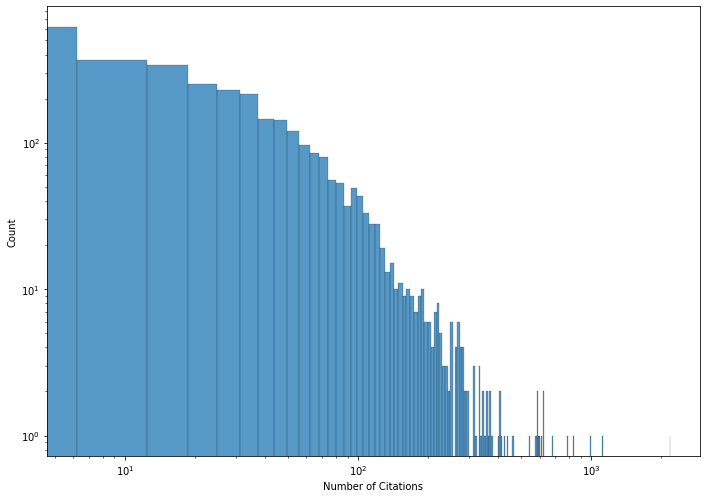

In [45]:
# distribution of number of Citations
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(paper_df['Number of Citations'], ax=ax)
plt.xscale('log')
plt.yscale('log')

In [33]:
citation_paper_df = pd.read_csv("openalex_citation_paper_df.csv")

In [37]:
## There are 60K unique citation papers
unique_citation_paper = list(set(citation_paper_df['OpenAlex ID']))
len(unique_citation_paper)

59912

In [39]:
## 40% of all citation papers are unique
len(unique_citation_paper) / total_num_citation_paper

0.39223542505482994